# YOLO Básico com Ultralytics

Neste notebook, vamos explorar os conceitos básicos do YOLO utilizando a biblioteca Ultralytics. Vamos aprender a:
1. Instalar e configurar a biblioteca
2. Carregar modelos pré-treinados
3. Realizar inferência em imagens e vídeos
4. Interpretar e visualizar resultados

## 1. Instalação e Setup

In [ ]:
# Instalação da biblioteca Ultralytics
# !pip install ultralytics
# !pip install opencv-python matplotlib

In [2]:
# Importação das bibliotecas necessárias
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 2. Carregando um modelo pré-treinado

In [3]:
# Carregando o modelo YOLOv8n (nano - versão mais leve)
model = YOLO('model/yolov8n.pt')

# Também podemos carregar diferentes tamanhos de modelo:
# model = YOLO('model/yolov8s.pt')  # small
# model = YOLO('model/yolov8m.pt')  # medium
# model = YOLO('model/yolov8l.pt')  # large
# model = YOLO('model/yolov8x.pt')  # extra large

## 3. Função auxiliar para visualização

In [4]:
def visualize_detection(image, results):
    """
    Visualiza a imagem com as detecções
    """
    # Se a imagem for uma string (caminho), carregamos ela
    if isinstance(image, str):
        image = cv2.imread(image)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Plotamos a imagem com as detecções
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    
    # Mostramos informações sobre as detecções
    boxes = results[0].boxes
    print(f"Foram detectados {len(boxes)} objetos")
    
    # Exibimos cada detecção
    for i, box in enumerate(boxes):
        cls = int(box.cls[0])
        name = model.names[cls]
        conf = float(box.conf[0])
        print(f"Detecção {i+1}: {name} com confiança {conf:.2f}")

## 4. Detecção em uma imagem local

In [ ]:
# Baixar uma imagem de exemplo

# no linux ou Google Colab
# !wget -O sample_image.jpg https://ultralytics.com/images/bus.jpg
# no macOS
# !curl -o sample_image.jpg https://ultralytics.com/images/bus.jpg

# pode usar requests para baixar a imagem independente do sistema operacional

import requests
import os

def baixar_arquivo(url, destino):
    """
    Baixa um arquivo a partir de uma URL e salva com o nome especificado.

    Parâmetros:
    - url (str): URL do arquivo a ser baixado.
    - destino (str): Caminho e nome do arquivo onde será salvo.

    Retorna:
    - True se o download foi bem-sucedido, False caso contrário.
    """
    try:
        if os.path.exists(destino):
            print(f"Arquivo já existe: {destino}")
            return True

        resposta = requests.get(url, timeout=10)
        resposta.raise_for_status()  # Levanta erro se status != 200

        with open(destino, "wb") as f:
            f.write(resposta.content)

        print(f"Download concluído: {destino}")
        return True
    except Exception as e:
        print(f"Erro ao baixar o arquivo: {e}")
        return False

url = "https://ultralytics.com/images/bus.jpg"
destino = "lab_images/sample_image.jpg"

baixar_arquivo(url, destino)


Download concluído: sample_image.jpg


True


image 1/1 /Users/arnaldoalvesvianajunior/shift-fiap/10-lab18-yolo/lab_images/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 74.2ms
Speed: 1.8ms preprocess, 74.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


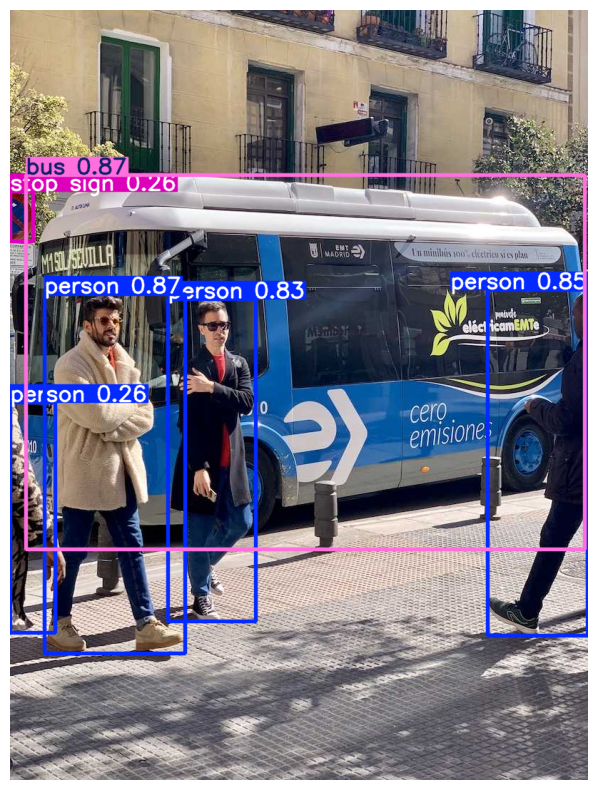

Foram detectados 6 objetos
Detecção 1: bus com confiança 0.87
Detecção 2: person com confiança 0.87
Detecção 3: person com confiança 0.85
Detecção 4: person com confiança 0.83
Detecção 5: person com confiança 0.26
Detecção 6: stop sign com confiança 0.26


In [5]:
# Realizar inferência na imagem
results = model('lab_images/bus.jpg')

# Visualizar os resultados
visualize_detection('lab_images/bus.jpg', results)

## 5. Explorando os resultados

In [7]:
# Examinando o objeto de resultados, no library ultralytics

# Exibindo informações específicas
print("\nInformações específicas do resultado:")

print(f"Tipo: {type(results[0])}")
print(f"Quantidade de boxes: {len(results[0].boxes)}")
# Exibindo informações de cada box
print("\nInformações de cada box:")
for i, box in enumerate(results[0].boxes):
    print(f"Box {i}:")
    print(f"  Coordenadas: {box.xyxy}")
    print(f"  Classe: {box.cls}")
    print(f"  Confiança: {box.conf}")

result = results[0] 

# Bounding boxes (coordenadas no formato [x1, y1, x2, y2])
print("Bounding boxes:")
print(result.boxes.xyxy)

# Classes detectadas
print("\nClasses detectadas:")
print(result.boxes.cls)

# Mapeando classes para nomes
print("\nNomes das classes:")
for c in result.boxes.cls:
    print(model.names[int(c)])

# Scores de confiança
print("\nScores de confiança:")
print(result.boxes.conf)


Informações específicas do resultado:
Tipo: <class 'ultralytics.engine.results.Results'>
Quantidade de boxes: 6

Informações de cada box:
Box 0:
  Coordenadas: tensor([[ 22.8713, 231.2773, 805.0027, 756.8405]])
  Classe: tensor([5.])
  Confiança: tensor([0.8734])
Box 1:
  Coordenadas: tensor([[ 48.5504, 398.5523, 245.3456, 902.7027]])
  Classe: tensor([0.])
  Confiança: tensor([0.8657])
Box 2:
  Coordenadas: tensor([[669.4729, 392.1861, 809.7202, 877.0355]])
  Classe: tensor([0.])
  Confiança: tensor([0.8528])
Box 3:
  Coordenadas: tensor([[221.5173, 405.7986, 344.9706, 857.5366]])
  Classe: tensor([0.])
  Confiança: tensor([0.8252])
Box 4:
  Coordenadas: tensor([[  0.0000, 550.5250,  63.0069, 873.4429]])
  Classe: tensor([0.])
  Confiança: tensor([0.2611])
Box 5:
  Coordenadas: tensor([[5.8161e-02, 2.5446e+02, 3.2557e+01, 3.2487e+02]])
  Classe: tensor([11.])
  Confiança: tensor([0.2551])
Bounding boxes:
tensor([[2.2871e+01, 2.3128e+02, 8.0500e+02, 7.5684e+02],
        [4.8550e+01, 3

## 6. Detecção em vídeo

In [ ]:
# Baixar um vídeo de exemplo
# - https://drive.google.com/file/d/1RMkFUVCeuuU76-9IDNbVoQr8R1NUS0Di/view?usp=sharing

# # Instale o gdown se necessário (no Colab já costuma estar instalado)
# !pip install -q gdown

# # Baixe o vídeo
# !gdown 1RMkFUVCeuuU76-9IDNbVoQr8R1NUS0Di -O lab_images/race_car.mp4


Download concluído: sample_video.mp4


True

In [ ]:
# Processar o vídeo
results_video = model('lab_images/pombos.mp4', 
                      conf=0.3, 
                      classes=[13, 14],
                      save=True)


# results_custom = model(
#     'lab_images/bus.jpg',
#     conf=0.5,        # Limiar de confiança (padrão 0.25)
#     iou=0.7,         # Limiar IoU para NMS (padrão 0.45)
#     max_det=20,      # Número máximo de detecções
#     classes=[13, 14]   # Filtrar apenas pessoas (0) e carros (2)
# )

# O vídeo processado estará disponível na pasta 'runs/detect/predict/'


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1296) /Users/arnaldoalvesvianajunior/shift-fiap/10-lab18-yolo/lab_images/pombos.mp4: 384x640 18 birds, 408.2ms
video 1/1 (frame 2/1296) /Users/arnaldoalvesvianajunior/shift-fiap/10-lab18-yolo/lab_images/pombos.mp4: 384x640 19 birds, 389.1ms
video 1/1 (frame 3/1296) /Users/arnaldoalvesvianajunior/shift-fiap/10-lab18-yolo/lab_images/pombos.mp4: 384x640 17 birds, 381.8ms
video 1/1 (frame 4/1296) /Users/arnaldoalvesvianajunior/shift-fiap

: 

## 7. Detecção com webcam (se estiver disponível)

In [12]:
# Código para executar em ambiente local (não funciona no notebook remoto)

# Inicializar a câmera
cap = cv2.VideoCapture(1)  # 0 para a webcam padrão
# cap = cv2.VideoCapture("race_car.mp4")  # Para usar um vídeo específico
model = YOLO('model/yolov8x.pt')  # Carregar o modelo YOLOv8n
# Verificar se a câmera foi aberta corretamente
if not cap.isOpened():
    print("Erro ao abrir a câmera")
else:
    while True:
        # Capturar frame
        ret, frame = cap.read()
        
        if not ret:
            print("Erro ao capturar o frame")
            break
            
        # Realizar detecção
        results = model(frame)
        # results = model(frame, conf=0.5)
        
        # Desenhar as detecções
        annotated_frame = results[0].plot()
        
        # Exibir a imagem
        cv2.imshow('YOLOv8 Detection', annotated_frame)
        
        # Sair se pressionar 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
            
    # Liberar recursos
    cap.release()
    cv2.destroyAllWindows()


100%|██████████| 131M/131M [00:12<00:00, 10.6MB/s] 



0: 384x640 1 person, 409.1ms
Speed: 2.2ms preprocess, 409.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 391.8ms
Speed: 1.5ms preprocess, 391.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 369.9ms
Speed: 1.6ms preprocess, 369.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 458.2ms
Speed: 5.6ms preprocess, 458.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 373.0ms
Speed: 1.8ms preprocess, 373.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 374.9ms
Speed: 1.7ms preprocess, 374.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 371.4ms
Speed: 1.5ms preprocess, 371.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 368.6ms
Speed: 1.5ms preprocess, 368.6ms inference, 0.5ms postprocess per image at

## 8. Ajustando os parâmetros de inferência


image 1/1 /Users/arnaldoalvesvianajunior/shift-fiap/10-lab18-yolo/lab_images/bus.jpg: 640x480 3 persons, 75.2ms
Speed: 2.7ms preprocess, 75.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


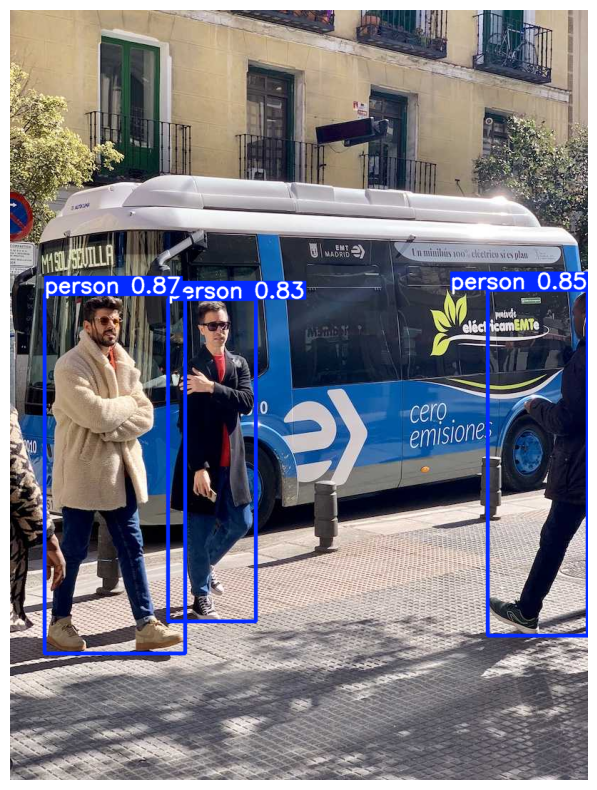

Foram detectados 3 objetos
Detecção 1: person com confiança 0.87
Detecção 2: person com confiança 0.85
Detecção 3: person com confiança 0.83


In [ ]:
# Realizar inferência com parâmetros personalizados
results_custom = model(
    'lab_images/bus.jpg',
    conf=0.5,        # Limiar de confiança (padrão 0.25)
    iou=0.7,         # Limiar IoU para NMS (padrão 0.45)
    max_det=20,      # Número máximo de detecções
    classes=[13, 14]   # Filtrar apenas pessoas (0) e carros (2)
)

# Visualizar os resultados
visualize_detection('lab_images/bus.jpg', results_custom)

## 9. Lista de classes COCO (conjunto de dados padrão)

In [13]:
# Listar todas as classes que o modelo pode detectar
for idx, class_name in model.names.items():
    print(f"{idx}: {class_name}")

0: person
1: bicycle
2: car
3: motorcycle
4: airplane
5: bus
6: train
7: truck
8: boat
9: traffic light
10: fire hydrant
11: stop sign
12: parking meter
13: bench
14: bird
15: cat
16: dog
17: horse
18: sheep
19: cow
20: elephant
21: bear
22: zebra
23: giraffe
24: backpack
25: umbrella
26: handbag
27: tie
28: suitcase
29: frisbee
30: skis
31: snowboard
32: sports ball
33: kite
34: baseball bat
35: baseball glove
36: skateboard
37: surfboard
38: tennis racket
39: bottle
40: wine glass
41: cup
42: fork
43: knife
44: spoon
45: bowl
46: banana
47: apple
48: sandwich
49: orange
50: broccoli
51: carrot
52: hot dog
53: pizza
54: donut
55: cake
56: chair
57: couch
58: potted plant
59: bed
60: dining table
61: toilet
62: tv
63: laptop
64: mouse
65: remote
66: keyboard
67: cell phone
68: microwave
69: oven
70: toaster
71: sink
72: refrigerator
73: book
74: clock
75: vase
76: scissors
77: teddy bear
78: hair drier
79: toothbrush


In [5]:
from ultralytics import YOLO
import ultralytics
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ultralytics.checks()

Ultralytics 8.3.134 🚀 Python-3.9.6 torch-2.3.0 CPU (Apple M2)
Setup complete ✅ (8 CPUs, 16.0 GB RAM, 294.2/460.4 GB disk)



0: 640x480 4 persons, 1 bus, 1 stop sign, 67.2ms
Speed: 2.8ms preprocess, 67.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


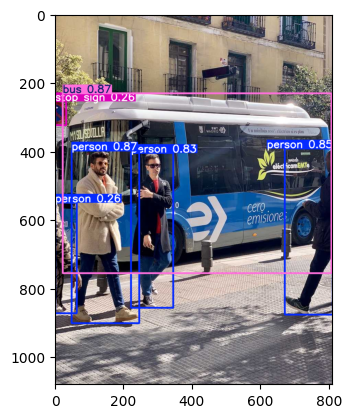

In [7]:
imagem= cv2.imread("lab_images/bus.jpg", cv2.IMREAD_COLOR)


model = YOLO('model/yolov8n.pt')
results = model.predict(imagem, conf=0.25)

image_result = results[0].plot()
image_result = cv2.cvtColor(image_result, cv2.COLOR_BGR2RGB)

plt.imshow(image_result)